In [4]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import xlrd


In [6]:
DATA_FILE = './fire_theft.xls'

In [7]:
# Step 1: read in data from the .xls file
book = xlrd.open_workbook(DATA_FILE, encoding_override="utf-8")
sheet = book.sheet_by_index(0)
data = np.asarray([sheet.row_values(i) for i in range(1, sheet.nrows)])
n_samples = sheet.nrows - 1

In [8]:
# Step 2: create placeholders for input X (number of fire) and label Y (number of theft)
X = tf.placeholder(tf.float32, name='X')
Y = tf.placeholder(tf.float32, name='Y')

In [9]:
# Step 3: create weight and bias, initialized to 0
w = tf.Variable(0.0, name='weights')
b = tf.Variable(0.0, name='bias')

In [10]:
# Step 4: build model to predict Y
Y_predicted = X * w + b 

In [11]:
# Step 5: use the square error as the loss function
loss = tf.square(Y - Y_predicted, name='loss')

In [13]:
# Step 6: using gradient descent with learning rate of 0.01 to minimize loss
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001).minimize(loss)

In [14]:
with tf.Session() as sess:
    # Step 7: initialize the necessary variables, in this case, w and b
    sess.run(tf.global_variables_initializer()) 
    
    writer = tf.summary.FileWriter('./my_graph/03/linear_reg', sess.graph)
    
    # Step 8: train the model
    for i in range(100): # train the model 100 times
        total_loss = 0
        for x, y in data:
            # Session runs train_op and fetch values of loss
            _, l = sess.run([optimizer, loss], feed_dict={X: x, Y:y}) 
            total_loss += l
        print 'Epoch {0}: {1}'.format(i, total_loss/n_samples)

    # close the writer when you're done using it
    writer.close() 
    
    # Step 9: output the values of w and b
    w_value, b_value = sess.run([w, b]) 

Epoch 0: 2069.6319334
Epoch 1: 2117.0123582
Epoch 2: 2092.302723
Epoch 3: 2068.50804619
Epoch 4: 2045.59118409
Epoch 5: 2023.51464481
Epoch 6: 2002.24476198
Epoch 7: 1981.7483388
Epoch 8: 1961.99444113
Epoch 9: 1942.95201161
Epoch 10: 1924.59308236
Epoch 11: 1906.88988006
Epoch 12: 1889.81645058
Epoch 13: 1873.34713384
Epoch 14: 1857.45884006
Epoch 15: 1842.12787424
Epoch 16: 1827.33249512
Epoch 17: 1813.05205797
Epoch 18: 1799.26608476
Epoch 19: 1785.95621323
Epoch 20: 1773.10248531
Epoch 21: 1760.68912948
Epoch 22: 1748.69841571
Epoch 23: 1737.11386804
Epoch 24: 1725.92087307
Epoch 25: 1715.10462496
Epoch 26: 1704.65009543
Epoch 27: 1694.54471349
Epoch 28: 1684.77463113
Epoch 29: 1675.32845097
Epoch 30: 1666.19353858
Epoch 31: 1657.35840021
Epoch 32: 1648.81226585
Epoch 33: 1640.54407425
Epoch 34: 1632.54468361
Epoch 35: 1624.80433151
Epoch 36: 1617.31268
Epoch 37: 1610.06225325
Epoch 38: 1603.04335572
Epoch 39: 1596.24791761
Epoch 40: 1589.66805633
Epoch 41: 1583.29652426
Epoch 42: 

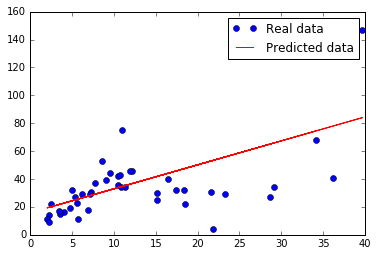

In [15]:
# plot the results
X, Y = data.T[0], data.T[1]
plt.plot(X, Y, 'bo', label='Real data')
plt.plot(X, X * w_value + b_value, 'r', label='Predicted data')
plt.legend()
plt.show()